In [53]:
from img2table.document import Image
from img2table.ocr import PaddleOCR
from PIL import Image as PIL_Image, ImageDraw
import pandas as pd
import cv2
import matplotlib.pyplot as plt

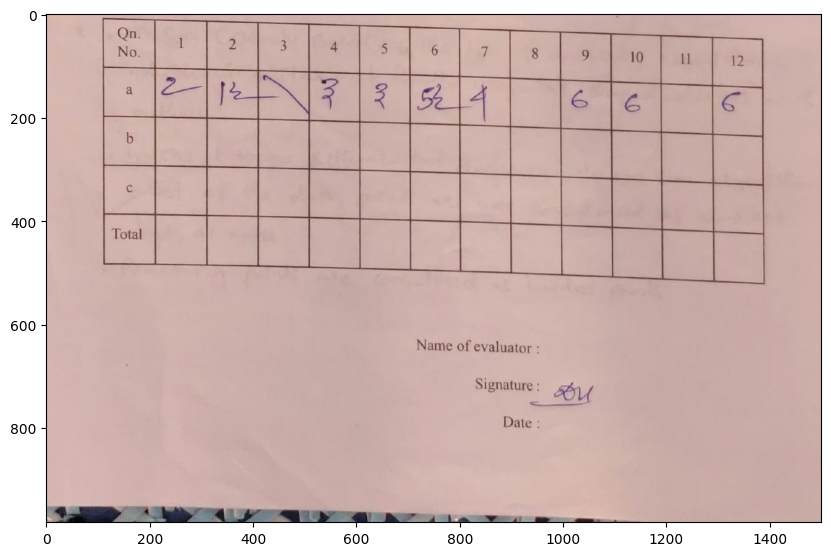

In [69]:
image = cv2.imread('abdul.jpg')
height, width, _ = image.shape
# print(image.shape)
img_lowerHalf = image[height//2+100:, 100:-100]
plt.figure(figsize=(10, 10))
plt.imshow(img_lowerHalf)
plt.show()

In [89]:
paddle_ocr = PaddleOCR(lang="en")
src = "C:/Users/ASUS/Desktop/image to table/ab_cut.jpg"

In [95]:
type(doc)

img2table.document.image.Image

AttributeError: 'Image' object has no attribute 'shape'

In [90]:
# Instantiation of document, either an image or a PDF
doc = Image(src, dpi=200)

# Table extraction
extracted_tables = doc.extract_tables(ocr=paddle_ocr,
                                      implicit_rows=True,
                                      min_confidence=50)

extracted_tables

[ExtractedTable(title=None, bbox=(71, 51, 1348, 526),shape=(5, 13))]

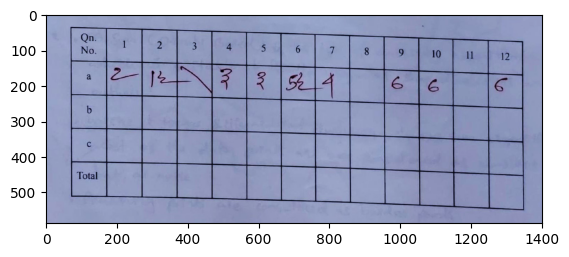

In [91]:
# Load the image using PIL
img = PIL_Image.open(src)

# Create a draw object
draw = ImageDraw.Draw(img)

plt.imshow(img)

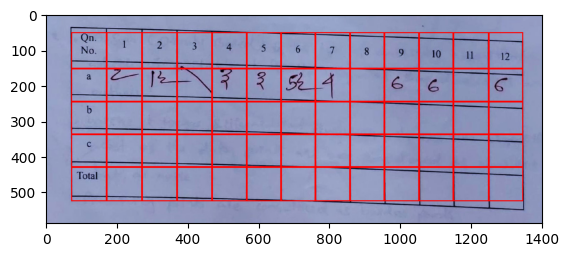

In [92]:
for table in extracted_tables:
    for row in table.content.values():
        for cell in row:
            draw.rectangle((cell.bbox.x1, cell.bbox.y1, cell.bbox.x2, cell.bbox.y2), outline="red", width=3)
            
plt.imshow(img)            

In [93]:
# Save the image with boxes around the detected tables
# img.save("C:/Users/ASUS/Desktop/image to table/new_with_boxes.jpg")

In [94]:
table.df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Qn.\nNo.,1,2,3,4,5,6,7,8,9,10,11,12
1,a,2,12,None,3,None,None,None,None,6,6,None,6
2,b,None,None,None,None,None,None,None,None,None,None,None,None
3,C,None,None,None,None,None,None,None,None,None,None,None,None
4,Total,None,None,None,None,None,None,None,None,None,None,None,None


In [13]:
df = df.iloc[1:, 1:] # deleting first row and column

df

,1,2,3,4,5,6,7,8,9,10,11
1,4,None,None,2,22,None,None,None,None,None,3
2,None,None,None,None,None,None,None,None,None,None,None
3,None,None,None,None,None,None,None,None,None,None,None
4,None,None,None,None,None,None,None,None,None,None,None


In [55]:
arr = df.to_numpy()
flat = arr.flatten(order='F') # flattening column-wise

In [56]:
vals = [str(i) for i in flat]
vals

['4',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 '2',
 'None',
 'None',
 'None',
 '22',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 '3',
 'None',
 'None',
 'None']

In [37]:
vals[10]

'None'

In [39]:
# Create the dictionary with empty lists
my_dict = {key: [] for key in ['1a', '1b', '1c', '2a', '2b', '2c', '3a', '3b', '3c', '4a', '4b', '4c', '5a', '5b', '5c', '6a', '6b', '6c', '7a', '7b', '7c', '8a', '8b', '8c', '9a', '9b', '9c', '10a', '10b', '10c', '11a', '11b', '11c', '12a', '12b', '12c']}

# Loop through the keys of the dictionary
i = 0
for key in my_dict:
    # Append the example values to the list corresponding to the current key
    my_dict[key].append(vals[i])
    i+=1

my_dict

{'1a': ['4'],
 '1b': ['None'],
 '1c': ['None'],
 '2a': ['None'],
 '2b': ['None'],
 '2c': ['None'],
 '3a': ['None'],
 '3b': ['None'],
 '3c': ['None'],
 '4a': ['None'],
 '4b': ['None'],
 '4c': ['None'],
 '5a': ['2'],
 '5b': ['None'],
 '5c': ['None'],
 '6a': ['None'],
 '6b': ['22'],
 '6c': ['None'],
 '7a': ['None'],
 '7b': ['None'],
 '7c': ['None'],
 '8a': ['None'],
 '8b': ['None'],
 '8c': ['None'],
 '9a': ['None'],
 '9b': ['None'],
 '9c': ['None'],
 '10a': ['None'],
 '10b': ['None'],
 '10c': ['None'],
 '11a': ['None'],
 '11b': ['None'],
 '11c': ['None'],
 '12a': ['None'],
 '12b': ['None'],
 '12c': ['None']}

In [64]:
# saving dict as csv
dict_df = pd.DataFrame(my_dict)
dict_df.to_csv("dict_csv.csv", index=False)